In [1]:
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import iplot
import numpy as np
import statistics 
import plotly.express as px
from numpy.lib import recfunctions as rfn
import plotnine as plt9
from plotnine import *
from plotnine.data import *

#In the cases where you have technical replicates, take average expression across all cells spanning both replicates. 

#In the cases in E07 where you don't have two replicates, but you have one, take the average expression there. 


In [2]:
#E7 Data
e7_t01_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t02_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t04_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T04_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t05_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T05_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t07_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T07_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t08_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T08_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t09_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T09_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t10_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T10_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t11_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T11_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t13_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T13_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t15_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T15_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t16_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T16_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t17_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T17_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t18_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T18_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t20_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T20_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t21_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T21_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t22_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T22_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame

e7_cell_types = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_E7_cell_type.txt", sep="\t") #pandas DataFrame for cell types

e7_cell_types_list = ['Alpha','Beta','Delta','Gamma','Epsilon'] #the cell types of interest for this work
e7_cell_types = e7_cell_types[e7_cell_types['CellType'].isin(e7_cell_types_list)] # parsing sampele type list, to only contain the cell types of interest
e7_cell_types.reset_index(drop=True, inplace=True)

updated_list = []
for t in e7_cell_types['SampleID'].values:
    if t in ['T01', 'T02']:
        updated_list.append('0Hr')
    elif t in ['T04','T05']:
        updated_list.append('1Hr')
    elif t in ['T07','T08','T09', 'T10']:
        updated_list.append('2Hr')
    elif t in ['T11','T13']:
        updated_list.append('4Hr')
    elif t in ['T15','T16','T17','T18']:
        updated_list.append('12Hr')
    elif t in ['T20','T21','T22']:
        updated_list.append('24Hr')
    else:
        updated_list.append('NA')
        updated_list = []
        
e7_cell_types['TimePoint'] = updated_list


# Data dict
e7_sample_dict = {
    'T01': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T02': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T04': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T04_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T05': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T05_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T07': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T07_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T08': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T08_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T09': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T09_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T10': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T10_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T11': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T11_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T13': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T13_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T15': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T15_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T16': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T16_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T17': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T17_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T18': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T18_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T20': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T20_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T21': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T21_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), 
    'T22': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T22_logNorm.csv.gz", sep=",", index_col=0,low_memory=False)     
}

In [3]:
#E12 Data

e12_t01_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t02_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t03_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-03_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t04_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-04_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t05_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-05_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t06_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-06_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t07_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-07_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t08_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-08_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t09_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-09_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t10_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-10_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t11_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-11_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t12_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-12_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t13_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-13_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t14_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-14_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t15_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-15_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t16_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-16_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t17_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-17_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t18_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-18_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t19_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-19_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t20_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-20_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t21_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-21_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e12_t22_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-22_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame

e12_cell_types = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12_cell_type.txt", sep="\t") #pandas DataFrame for cell types

e12_cell_types_list = ['Alpha','Beta','Delta','Gamma','Epsilon'] #the cell types of interest for this work
e12_cell_types = e12_cell_types[e12_cell_types['CellType'].isin(e12_cell_types_list)] # parsing sampele type list, to only contain the cell types of interest
e12_cell_types.reset_index(drop=True, inplace=True)

updated_list = []
for t in e12_cell_types['SampleID'].values:
    if t in ['E12-01', 'E12-02']:
        updated_list.append('0Hr')
    elif t in ['E12-03','E12-04','E12-05', 'E12-06']:
        updated_list.append('2Hr')
    elif t in ['E12-07','E12-08','E12-09','E12-10']:
        updated_list.append('4Hr')
    elif t in ['E12-11','E12-12','E12-13','E12-14']:
        updated_list.append('8Hr')
    elif t in ['E12-15','E12-16','E12-17','E12-18']:
        updated_list.append('12Hr')
    elif t in ['E12-19','E12-20','E12-21','E12-22']:
        updated_list.append('24Hr')
    else:
        updated_list.append('NA')
        
e12_cell_types['TimePoint'] = updated_list

# Data dict
e12_sample_dict = {
    'E12-01': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),
    'E12-02': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-03': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-03_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-04': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-04_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-05': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-05_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-06': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-06_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-07': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-07_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-08': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-08_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-09': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-09_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-10': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-10_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),    
    'E12-11': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-11_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-12': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-12_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-13': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-13_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-14': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-14_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),   
    'E12-15': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-15_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-16': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-16_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),    
    'E12-17': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-17_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-18': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-18_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-19': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-19_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-20': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-20_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-21': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-21_logNorm.csv.gz", sep=",", index_col=0,low_memory=False),  
    'E12-22': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E12_logNorm/200613_E12-22_logNorm.csv.gz", sep=",", index_col=0,low_memory=False)  
}


In [112]:
#E12 Data Manipulation
e12_cells = pd.DataFrame([], columns = ['gene12', 'mean_expr_1', 'mean_expr_2','cell_type12', 'time_point'])

for cell_type in np.unique(e12_cell_types['CellType']):
    if cell_type == "unknown":
        continue
    sub_cells = e12_cell_types[e12_cell_types.CellType == cell_type]
    for time_point in np.unique(e12_cell_types['TimePoint']):
        ## To do -- deal with High / low glucose treatment
        sampls = np.unique(e12_cell_types[e12_cell_types.TimePoint == time_point]['SampleID'])
        
        #Get sample IDs
        counts_1 = e12_sample_dict.get(sampls[0])
        counts_2 = e12_sample_dict.get(sampls[1])
        
        if counts_1 is None or counts_2 is None:
            continue
        
        barcodes_1 = sub_cells[sub_cells.SampleID == sampls[0]]['CellID'].values
        barcodes_2 = sub_cells[sub_cells.SampleID == sampls[1]]['CellID'].values
        means_1 = np.mean(counts_1.loc[:, barcodes_1],axis=1) 
        means_2 = np.mean(counts_2.loc[:, barcodes_2],axis=1)
        joint_index = np.intersect1d(means_1.index.values, means_2.index.values)

        e12_cells = e12_cells.append( #look at the gene name for R1 and R2, output that and compare to see if they match or not*
            pd.DataFrame({
                'gene': joint_index,
                'mean_expr_1': means_1.loc[joint_index].values,
                'mean_expr_2': means_2.loc[joint_index].values,
                'cell_type': [cell_type] * len(joint_index),
                'time_point': [time_point] * len(joint_index)  
            }))


# e12_cells
e12_cells['exp_12_mean'] = e12_cells.mean(axis=1)
e12_final = e12_cells.copy()
e12_final.drop(['mean_expr_1', 'mean_expr_2'], axis=1,inplace=True)

In [113]:
#E7 Data Manipulation


e7_cells = pd.DataFrame([], columns = ['gene', 'mean_expr_1', 'mean_expr_2', 'cell_type', 'time_point'])

for cell_type in np.unique(e7_cell_types['CellType']):
    if cell_type == "unknown":
        continue
    sub_cells = e7_cell_types[e7_cell_types.CellType == cell_type]
    for time_point in np.unique(e7_cell_types['TimePoint']):
        sampls = np.unique(e7_cell_types[e7_cell_types.TimePoint == time_point]['SampleID'])
        
        #Get sample IDs
        counts_1 = e7_sample_dict.get(sampls[0])
        counts_2 = e7_sample_dict.get(sampls[1])
        
        if counts_1 is None or counts_2 is None:
            continue
        
        barcodes_1 = sub_cells[sub_cells.SampleID == sampls[0]]['CellID'].values
        barcodes_2 = sub_cells[sub_cells.SampleID == sampls[1]]['CellID'].values
        means_1 = np.mean(counts_1.loc[:, barcodes_1],axis=1) 
        means_2 = np.mean(counts_2.loc[:, barcodes_2],axis=1)
        joint_index = np.intersect1d(means_1.index.values, means_2.index.values)

        e7_cells = e7_cells.append( #look at the gene name for R1 and R2, output that and compare to see if they match or not*
            pd.DataFrame({
                'gene': joint_index,
                'mean_expr_1': means_1.loc[joint_index].values,
                'mean_expr_2': means_2.loc[joint_index].values,
                'cell_type': [cell_type] * len(joint_index),
                'time_point': [time_point] * len(joint_index)  
            }))

In [114]:
e7_cells['exp_7_avg'] = e7_cells.mean(axis=1)
e7_final = e7_cells.copy()
e7_final.drop(['mean_expr_1', 'mean_expr_2'], axis=1,inplace=True)

In [115]:
e7_final.reset_index(drop=True, inplace=True)
e12_final.reset_index(drop=True, inplace=True)
e12_e7_result = pd.concat([e7_final, e12_final], axis=1)

In [120]:
e12_e7_result.dropna()
# e12_e7_result

,gene,cell_type,time_point,exp_7_avg,gene,cell_type,time_point,exp_12_mean
0,A1BG,Alpha,0Hr,0.627806,A1BG,Alpha,0Hr,0.629801
1,A1CF,Alpha,0Hr,0.355107,A1CF,Alpha,0Hr,0.463481
2,A2M,Alpha,0Hr,0.001693,A2M,Alpha,0Hr,0.000258
3,A4GALT,Alpha,0Hr,0.012597,A4GALT,Alpha,0Hr,0.011272
4,AAAS,Alpha,0Hr,0.109295,AAAS,Alpha,0Hr,0.130755
...,...,...,...,...,...,...,...,...
277875,ZSWIM6,Gamma,4Hr,0.031584,RABAC1,Gamma,12Hr,1.715328
277876,ZSWIM7,Gamma,4Hr,0.348834,RABEP1,Gamma,12Hr,0.338094
277877,ZSWIM8,Gamma,4Hr,0.071838,RABEP2,Gamma,12Hr,0.169073
277878,ZYG11B,Gamma,4Hr,0.097449,RABGAP1,Gamma,12Hr,0.234039


/Users/krilowcn/anaconda3/envs/BINF/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 76279 rows containing missing values.
/Users/krilowcn/anaconda3/envs/BINF/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 76279 rows containing missing values.


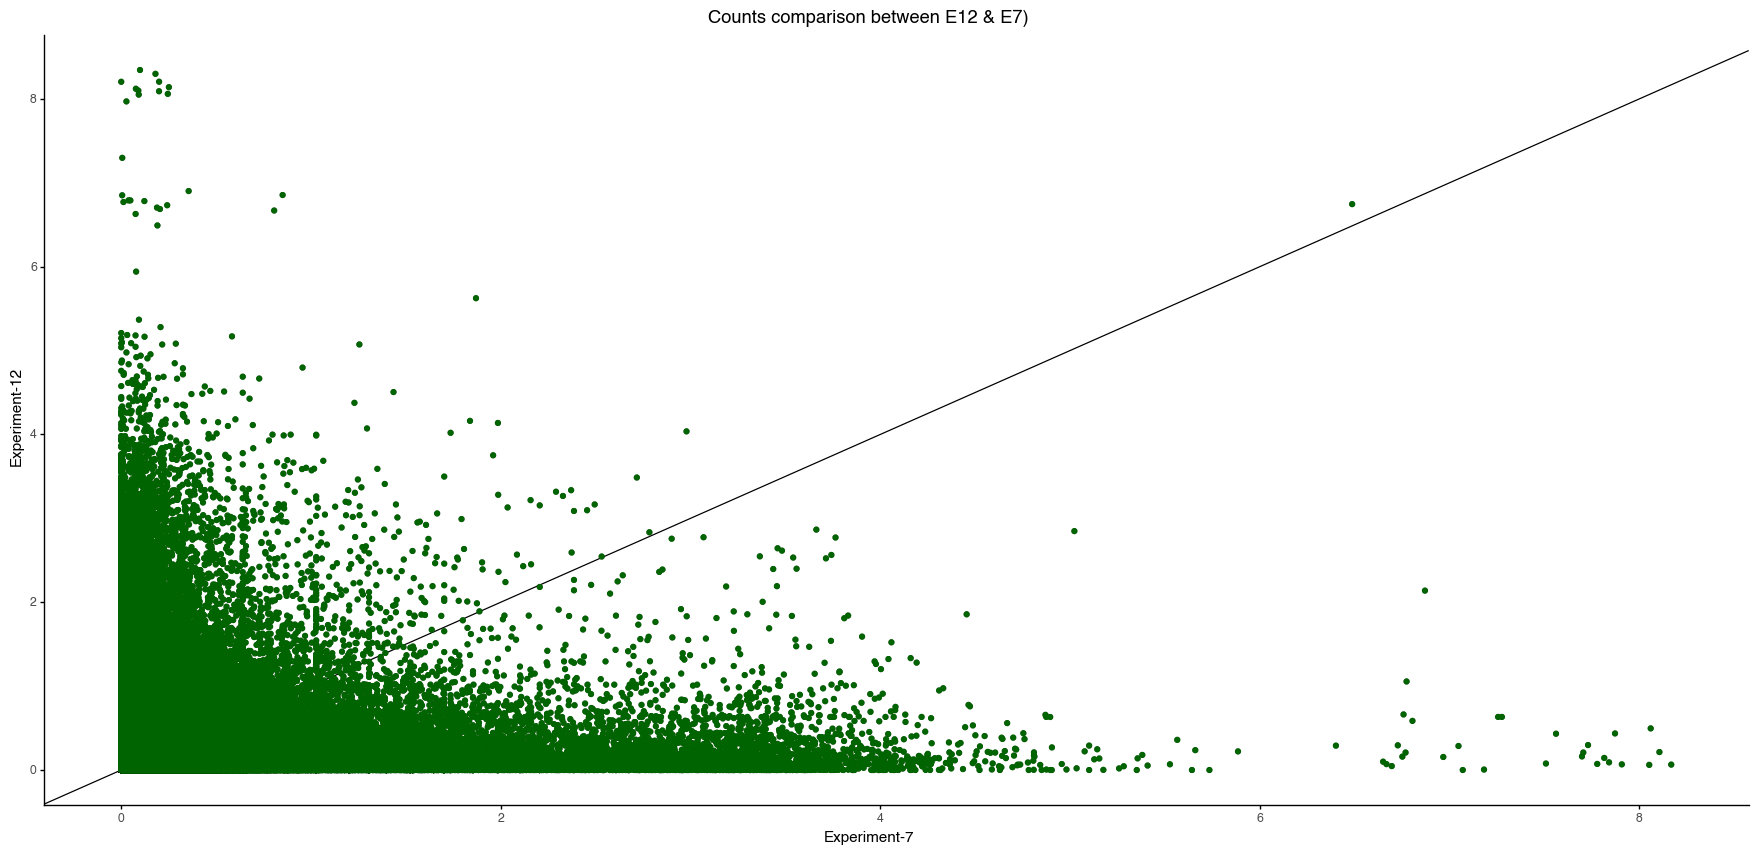

<ggplot: (8777962741682)>

In [122]:

%matplotlib inline

plt9.options.figure_size = (22,10)

plt9.ggplot(e12_e7_result, plt9.aes(
    x ='exp_7_avg', 
    y = 'exp_12_mean')) + plt9.geom_point(
        alpha=0.50) + geom_abline(intercept=0, 
    slope=1)  + labs(title="Counts comparison between E12 & E7",
                                                                x="Experiment-7",y="Experiment-12",size="Gene",color="Gene") + theme_classic(base_family = "Helvetica")+geom_point(color='darkgreen')


# p.save(filename = 'e_12_high_glucose.png', height=5, width=5, units = 'in', dpi=1000)